In [1]:
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

In [2]:
df = pd.read_csv('dataset.csv')
print(list(df.columns))
cols_to_drop = ['id','Title', 'Author','Pagecount','Autherkeywords','AuthorsID','Volume','Issue','Year','Pagestart','Pageend','Indexkeywords','Source', 'ENTRYTYPE', 'doi', 'url','Affiliations', 'Authors_affiliations', 'Address', 'Publisher', 'Language', 'AbbreviatedSource', 'Document_Type', 'Publication_Stage', 'Access_Type', 'EID',]
new_df = df.drop(cols_to_drop, axis=1)
new_df = new_df.fillna(0)
print(list(new_df.columns))

['id', 'primary', 'Title', 'Autherkeywords', 'Indexkeywords', 'Author', 'AuthorsID', 'Volume', 'Issue', 'Year', 'Pagestart', 'Pageend', 'Pagecount', 'Source', 'ENTRYTYPE', 'doi', 'url', 'citation_count', 'Affiliations', 'Authors_affiliations', 'Address', 'Publisher', 'Language', 'AbbreviatedSource', 'Document_Type', 'Publication_Stage', 'Access_Type', 'EID', 'ABSTRACT_VIEWS', 'ALL_BLOG_COUNT', 'CITED_BY_COUNT', 'DOWNLOAD_COUNT', 'EXPORTS_SAVES', 'FACEBOOK_COUNT', 'FULL_TEXT_VIEWS', 'LINK_CLICK_COUNT', 'LINK_OUTS', 'READER_COUNT', 'REFERENCE_COUNT', 'TWEET_COUNT', 'capture', 'citation', 'mention', 'socialMedia', 'usage']
['primary', 'citation_count', 'ABSTRACT_VIEWS', 'ALL_BLOG_COUNT', 'CITED_BY_COUNT', 'DOWNLOAD_COUNT', 'EXPORTS_SAVES', 'FACEBOOK_COUNT', 'FULL_TEXT_VIEWS', 'LINK_CLICK_COUNT', 'LINK_OUTS', 'READER_COUNT', 'REFERENCE_COUNT', 'TWEET_COUNT', 'capture', 'citation', 'mention', 'socialMedia', 'usage']


In [3]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   primary           75 non-null     float64
 1   citation_count    75 non-null     int64  
 2   ABSTRACT_VIEWS    75 non-null     float64
 3   ALL_BLOG_COUNT    75 non-null     float64
 4   CITED_BY_COUNT    75 non-null     float64
 5   DOWNLOAD_COUNT    75 non-null     float64
 6   EXPORTS_SAVES     75 non-null     float64
 7   FACEBOOK_COUNT    75 non-null     float64
 8   FULL_TEXT_VIEWS   75 non-null     float64
 9   LINK_CLICK_COUNT  75 non-null     float64
 10  LINK_OUTS         75 non-null     float64
 11  READER_COUNT      75 non-null     float64
 12  REFERENCE_COUNT   75 non-null     float64
 13  TWEET_COUNT       75 non-null     float64
 14  capture           75 non-null     float64
 15  citation          75 non-null     float64
 16  mention           75 non-null     float64
 17 

In [7]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(new_df.drop(labels=['primary'], axis=1),
    new_df['primary'],
    test_size=0.3,
    random_state=0)

In [8]:
X_train.head()

,citation_count,ABSTRACT_VIEWS,ALL_BLOG_COUNT,CITED_BY_COUNT,DOWNLOAD_COUNT,EXPORTS_SAVES,FACEBOOK_COUNT,FULL_TEXT_VIEWS,LINK_CLICK_COUNT,LINK_OUTS,READER_COUNT,REFERENCE_COUNT,TWEET_COUNT,capture,citation,mention,socialMedia,usage
4,5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,23.0,5.0,0.0,0.0,0.0
65,4,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0
48,4,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,31.0,4.0,0.0,0.0,0.0
2,10,540.0,0.0,10.0,0.0,18.0,0.0,0.0,0.0,43.0,68.0,0.0,1.0,86.0,10.0,0.0,1.0,583.0
45,4,8.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,3.0,4.0,0.0,2.0,8.0


In [9]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.05422336, 0.0291943 , 0.        , 0.02616591, 0.        ,
       0.        , 0.        , 0.00160748, 0.        , 0.00227909,
       0.05085165, 0.        , 0.        , 0.0741786 , 0.05547582,
       0.        , 0.        , 0.0322582 ])

In [10]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

capture             0.074179
citation            0.055476
citation_count      0.054223
READER_COUNT        0.050852
usage               0.032258
ABSTRACT_VIEWS      0.029194
CITED_BY_COUNT      0.026166
LINK_OUTS           0.002279
FULL_TEXT_VIEWS     0.001607
EXPORTS_SAVES       0.000000
FACEBOOK_COUNT      0.000000
LINK_CLICK_COUNT    0.000000
DOWNLOAD_COUNT      0.000000
REFERENCE_COUNT     0.000000
TWEET_COUNT         0.000000
ALL_BLOG_COUNT      0.000000
mention             0.000000
socialMedia         0.000000
dtype: float64

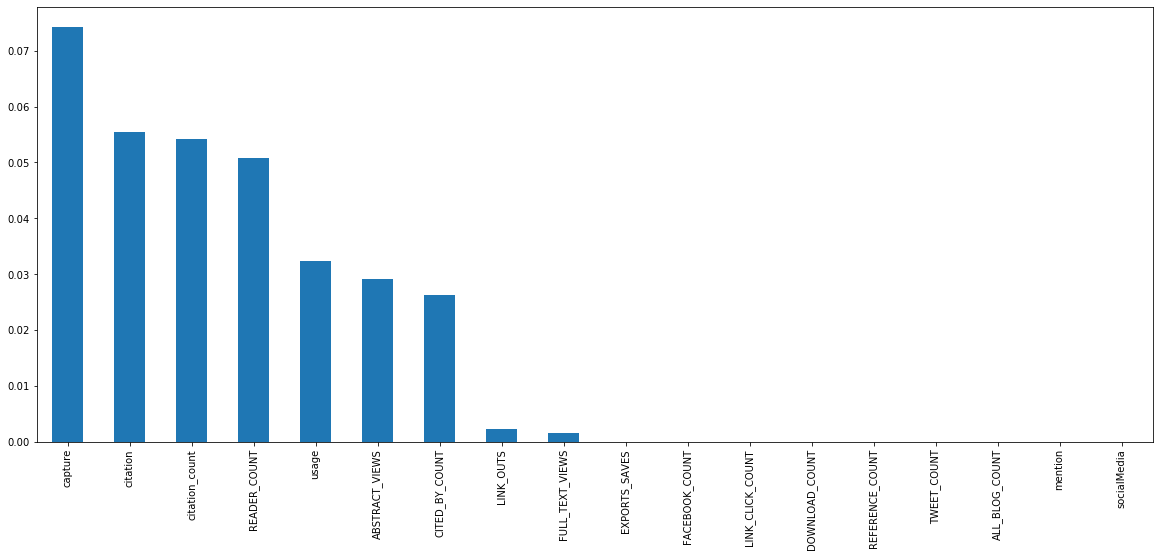

In [11]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [12]:
from sklearn.feature_selection import SelectKBest

In [13]:

#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['citation_count', 'CITED_BY_COUNT', 'EXPORTS_SAVES', 'capture',
       'citation'],
      dtype='object')